Za każdym razem możemy pobrać najnowszą wersję danych - są one aktualizowane codziennie na kaggle

In [3]:
import kagglehub
import shutil
import os

# Ściągnij dane
path = kagglehub.dataset_download("dissfya/wta-tennis-2007-2023-daily-update")

# Folder docelowy
target_dir = "../data/"
os.makedirs(target_dir, exist_ok=True)

# Skopiuj wszystkie pliki z folderu KaggleHuba do data/
for filename in os.listdir(path):
    src_file = os.path.join(path, filename)
    dst_file = os.path.join(target_dir, filename)
    shutil.copy2(src_file, dst_file)

print(f"Dane zostały zapisane do folderu: {target_dir}")


c:\Users\marta\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 996k/996k [00:00<00:00, 1.48MB/s]

Extracting files...


Dane zostały zapisane do folderu: ../data/


# Analiza eksploracyjna danych

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/wta.csv")

C:\Users\marta\AppData\Local\Temp\ipykernel_19564\4240325047.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/wta.csv")


In [5]:
df.head() # Pierwsze 5 wierszy

,Tournament,Date,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Sun T.T.,Baker L.,Sun T.T.,81,272,332,90,1.33,3.00,6-1 6-1
1,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Myskina A.,Dulko G.,Dulko G.,16,59,1000,401,1.22,3.75,1-6 7-6 2-6
2,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Loit E.,Birnerova E.,Loit E.,56,84,418,324,1.72,2.00,6-1 6-1
3,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Nakamura A.,Craybas J.,Craybas J.,57,70,405,365,1.83,1.83,5-7 2-6
4,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Bartoli M.,Morita A.,Bartoli M.,18,180,951,152,1.16,4.50,7-6 6-3


In [6]:
df.info() # typy danych, liczba nullow

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42135 entries, 0 to 42134
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  42135 non-null  object 
 1   Date        42135 non-null  object 
 2   Court       42135 non-null  object 
 3   Surface     42135 non-null  object 
 4   Round       42135 non-null  object 
 5   Best of     42135 non-null  int64  
 6   Player_1    42135 non-null  object 
 7   Player_2    42135 non-null  object 
 8   Winner      42135 non-null  object 
 9   Rank_1      42135 non-null  int64  
 10  Rank_2      42135 non-null  int64  
 11  Pts_1       42135 non-null  int64  
 12  Pts_2       42135 non-null  int64  
 13  Odd_1       42135 non-null  object 
 14  Odd_2       42135 non-null  float64
 15  Score       42135 non-null  object 
dtypes: float64(1), int64(5), object(10)
memory usage: 5.1+ MB


In [7]:
df.describe() # podstawowe statystyki liczbowe

,Best of,Rank_1,Rank_2,Pts_1,Pts_2,Odd_2
count,42135.000000,42135.000000,42135.000000,42135.000000,42135.000000,42135.000000
mean,3.000047,76.242198,75.078723,1560.751893,1578.514109,2.512287
std,0.009743,93.783095,92.380957,1601.414814,1622.822300,2.083786
min,3.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,3.000000,24.000000,24.000000,627.000000,630.000000,1.400000
50%,3.000000,54.000000,53.000000,1025.000000,1032.000000,1.830000
75%,3.000000,96.000000,95.000000,1831.500000,1847.000000,2.750000
max,5.000000,1876.000000,1825.000000,13615.000000,13615.000000,51.000000


In [8]:
df.isna().sum() # brak brakujących wartości

Tournament    0
Date          0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64

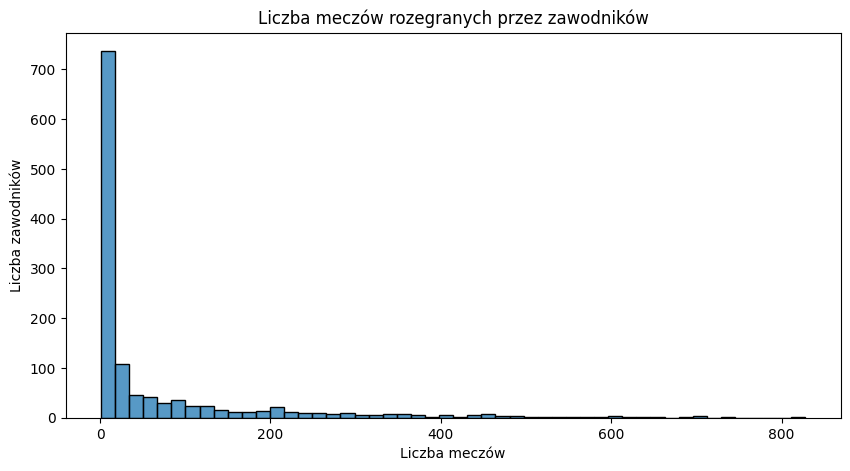

In [9]:
player_counts = pd.concat([df['Player_1'], df['Player_2']]).value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(player_counts, bins=50, kde=False)
plt.title("Liczba meczów rozegranych przez zawodników")
plt.xlabel("Liczba meczów")
plt.ylabel("Liczba zawodników")
plt.show()

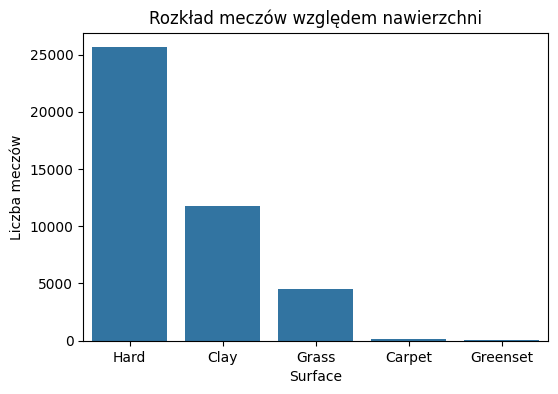

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Surface', order=df['Surface'].value_counts().index)
plt.title("Rozkład meczów względem nawierzchni")
plt.ylabel("Liczba meczów")
plt.show()

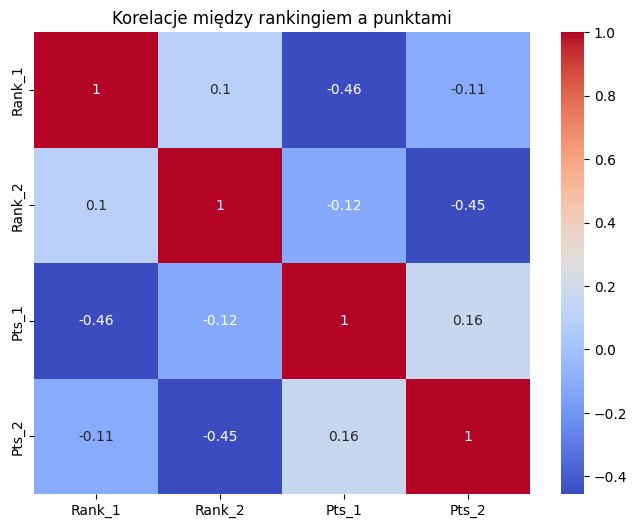

In [11]:
plt.figure(figsize=(8, 6))
numeric_cols = ['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelacje między rankingiem a punktami")
plt.show()


Wbrew pozorom korelacja między punktami a rankingiem zawodniczek nie jest bardzo wysoka. Obie zmienne mogą wnosić unikalną informację do modelu predykcyjnego, więc warto je zostawić.

### Wstępne hipotezy

- Czy ranking wpływa na zwycięstwo?

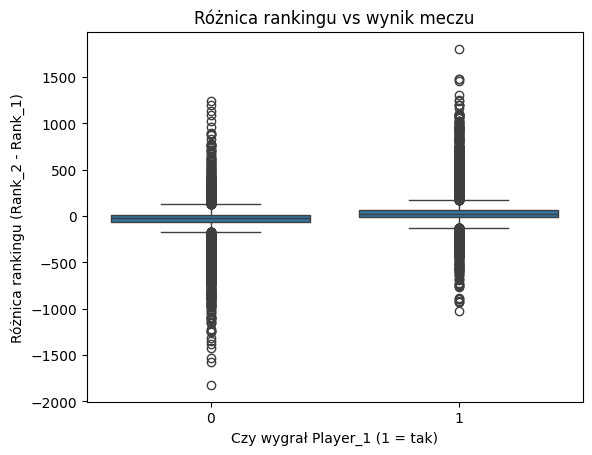

In [12]:
df['Player1_wins'] = (df['Winner'] == df['Player_1']).astype(int)
df['Rank_diff'] = df['Rank_2'] - df['Rank_1']  # pozytywna wartość: Player_1 ma lepszy ranking (ekstrakcja cechy)

sns.boxplot(x='Player1_wins', y='Rank_diff', data=df)
plt.title("Różnica rankingu vs wynik meczu")
plt.xlabel("Czy wygrał Player_1 (1 = tak)")
plt.ylabel("Różnica rankingu (Rank_2 - Rank_1)")
plt.show()


- Czy punkty wpływają na zwycięstwo?

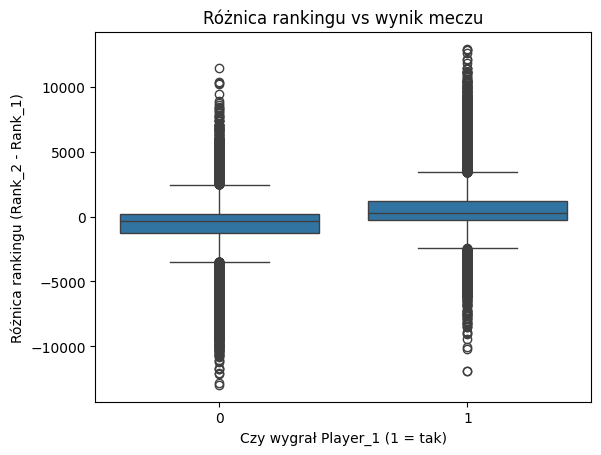

In [13]:
df['Points_diff'] = df['Pts_1'] - df['Pts_2']  # pozytywna wartość: Player_1 ma więcej punktów (ekstrakcja cechy)

sns.boxplot(x='Player1_wins', y='Points_diff', data=df)
plt.title("Różnica rankingu vs wynik meczu")
plt.xlabel("Czy wygrał Player_1 (1 = tak)")
plt.ylabel("Różnica rankingu (Rank_2 - Rank_1)")
plt.show()

# Przetwarzanie wstępne

- Normalizacja

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# przekonwertowanie Odd_1 z object na float by umozliwic normalizacje
df['Odd_1'] = pd.to_numeric(df['Odd_1'].str.replace(',', '.'), errors='coerce')

# normalizacja rankingow, punktow i kursow bukmacherskich
df[["Rank_1", "Rank_2", "Pts_1", "Pts_2", "Odd_1", "Odd_2", "Rank_diff", "Points_diff"]] = scaler.fit_transform(df[["Rank_1", "Rank_2", "Pts_1", "Pts_2", "Odd_1", "Odd_2", "Rank_diff", "Points_diff"]])
df.head()

,Tournament,Date,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player1_wins,Rank_diff,Points_diff
0,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Sun T.T.,Baker L.,Sun T.T.,0.042667,0.148575,0.024457,0.006683,0.066571,0.076923,6-1 6-1,1,0.555280,0.509845
1,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Myskina A.,Dulko G.,Dulko G.,0.008000,0.031798,0.073516,0.029524,0.063429,0.091346,1-6 7-6 2-6,0,0.514475,0.523628
2,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Loit E.,Birnerova E.,Loit E.,0.029333,0.045504,0.030773,0.023869,0.077714,0.057692,6-1 6-1,1,0.510339,0.504131
3,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Nakamura A.,Craybas J.,Craybas J.,0.029867,0.037829,0.029818,0.026880,0.080857,0.054423,5-7 2-6,0,0.506203,0.502046
4,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Bartoli M.,Morita A.,Bartoli M.,0.009067,0.098136,0.069918,0.011237,0.061714,0.105769,7-6 6-3,1,0.547284,0.531349


- Odrzucenie outlierów

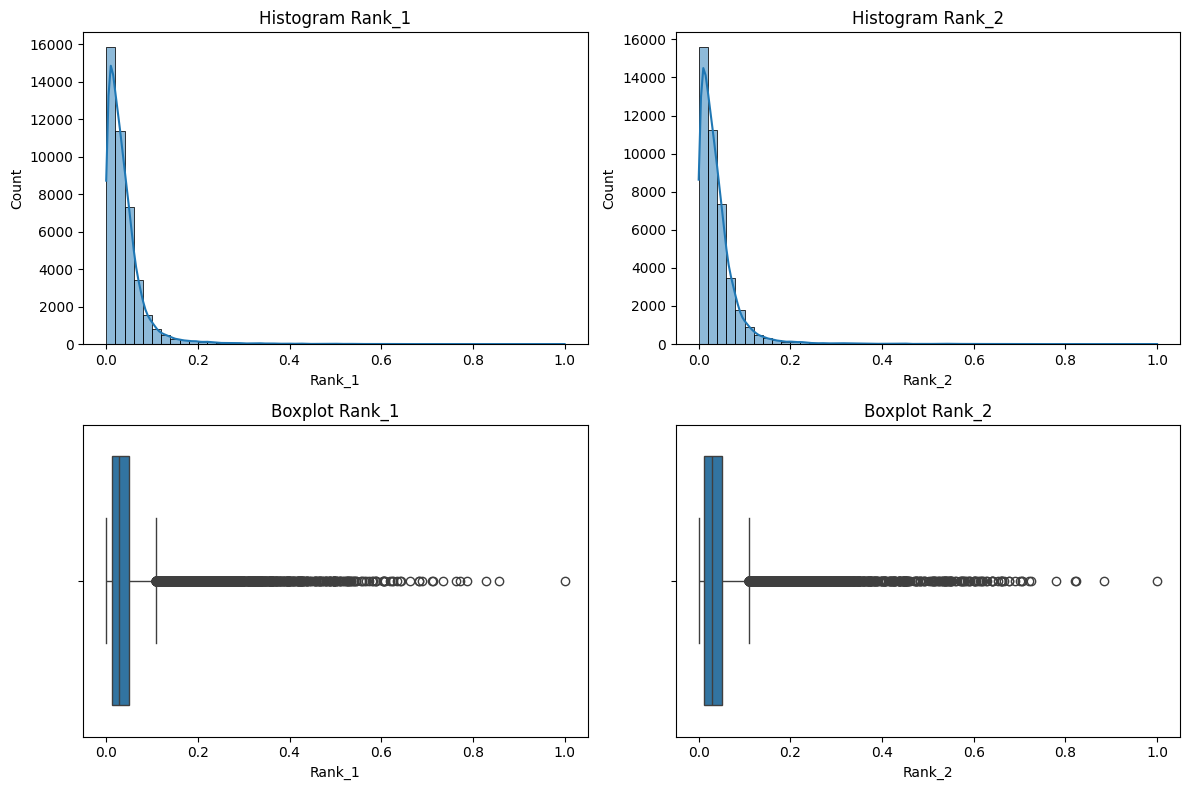

In [15]:
# Zmienna: rankingi
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['Rank_1'], bins=50, ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Histogram Rank_1')

sns.histplot(df['Rank_2'], bins=50, ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Histogram Rank_2')

sns.boxplot(x=df['Rank_1'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot Rank_1')

sns.boxplot(x=df['Rank_2'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot Rank_2')

plt.tight_layout()
plt.show()


Nie wiem czy usunięcie outlierów nie zaprowadzi do utraty cennych informacji o zawodnikach.

- Selekcja cech

In [16]:
df.head()

,Tournament,Date,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player1_wins,Rank_diff,Points_diff
0,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Sun T.T.,Baker L.,Sun T.T.,0.042667,0.148575,0.024457,0.006683,0.066571,0.076923,6-1 6-1,1,0.555280,0.509845
1,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Myskina A.,Dulko G.,Dulko G.,0.008000,0.031798,0.073516,0.029524,0.063429,0.091346,1-6 7-6 2-6,0,0.514475,0.523628
2,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Loit E.,Birnerova E.,Loit E.,0.029333,0.045504,0.030773,0.023869,0.077714,0.057692,6-1 6-1,1,0.510339,0.504131
3,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Nakamura A.,Craybas J.,Craybas J.,0.029867,0.037829,0.029818,0.026880,0.080857,0.054423,5-7 2-6,0,0.506203,0.502046
4,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Bartoli M.,Morita A.,Bartoli M.,0.009067,0.098136,0.069918,0.011237,0.061714,0.105769,7-6 6-3,1,0.547284,0.531349


Zostaną usunięte `Best of`, ponieważ kobiety grają tylko Bo3, `Winner`, które zastąpimy kolumną Player1_wins oraz `Tournament`, ponieważ nazwa turnieju nie będzie potrzebna w analizie.

In [17]:
df = df.drop(["Best of", "Winner", "Tournament"], axis=1)
df.head()

,Date,Court,Surface,Round,Player_1,Player_2,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player1_wins,Rank_diff,Points_diff
0,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Sun T.T.,Baker L.,0.042667,0.148575,0.024457,0.006683,0.066571,0.076923,6-1 6-1,1,0.555280,0.509845
1,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Myskina A.,Dulko G.,0.008000,0.031798,0.073516,0.029524,0.063429,0.091346,1-6 7-6 2-6,0,0.514475,0.523628
2,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Loit E.,Birnerova E.,0.029333,0.045504,0.030773,0.023869,0.077714,0.057692,6-1 6-1,1,0.510339,0.504131
3,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Nakamura A.,Craybas J.,0.029867,0.037829,0.029818,0.026880,0.080857,0.054423,5-7 2-6,0,0.506203,0.502046
4,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Bartoli M.,Morita A.,0.009067,0.098136,0.069918,0.011237,0.061714,0.105769,7-6 6-3,1,0.547284,0.531349


- Ekstrakcja cech

In [18]:
# podzielony score
df['Scores_split'] = df['Score'].apply(lambda x: x.split(' '))
df.head()

,Date,Court,Surface,Round,Player_1,Player_2,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player1_wins,Rank_diff,Points_diff,Scores_split
0,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Sun T.T.,Baker L.,0.042667,0.148575,0.024457,0.006683,0.066571,0.076923,6-1 6-1,1,0.555280,0.509845,"[6-1, 6-1, ]"
1,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Myskina A.,Dulko G.,0.008000,0.031798,0.073516,0.029524,0.063429,0.091346,1-6 7-6 2-6,0,0.514475,0.523628,"[1-6, 7-6, 2-6]"
2,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Loit E.,Birnerova E.,0.029333,0.045504,0.030773,0.023869,0.077714,0.057692,6-1 6-1,1,0.510339,0.504131,"[6-1, 6-1, ]"
3,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Nakamura A.,Craybas J.,0.029867,0.037829,0.029818,0.026880,0.080857,0.054423,5-7 2-6,0,0.506203,0.502046,"[5-7, 2-6, ]"
4,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Bartoli M.,Morita A.,0.009067,0.098136,0.069918,0.011237,0.061714,0.105769,7-6 6-3,1,0.547284,0.531349,"[7-6, 6-3, ]"


Wygrane sety i wygrane gemy

In [19]:
def count_sets_won(score):
    sets = score.split(' ')  # Podziel wynik na sety
    sets = [set_score for set_score in sets if set_score]  # Usuń puste elementy
    
    player_1_sets = 0
    player_2_sets = 0
    
    for set_score in sets:
        player_1, player_2 = map(int, set_score.split('-'))
        if player_1 > player_2:
            player_1_sets += 1
        else:
            player_2_sets += 1
            
    return player_1_sets, player_2_sets

def count_gems_won(score):
    sets = score.split(' ')  # Podziel wynik na sety
    sets = [set_score for set_score in sets if set_score]  # Usuń puste elementy

    player_1_gems = 0
    player_2_gems = 0

    for set_score in sets:
        player_1, player_2 = map(int, set_score.split('-'))
        player_1_gems += player_1
        player_2_gems += player_2

    return player_1_gems, player_2_gems


df[['Player_1_sets_won', 'Player_2_sets_won']] = df['Score'].apply(count_sets_won).apply(pd.Series)
df[['Player_1_gems_won', 'Player_2_gems_won']] = df['Score'].apply(count_gems_won).apply(pd.Series)

df = df.drop(["Scores_split"], axis=1)
df.head()


,Date,Court,Surface,Round,Player_1,Player_2,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player1_wins,Rank_diff,Points_diff,Player_1_sets_won,Player_2_sets_won,Player_1_gems_won,Player_2_gems_won
0,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Sun T.T.,Baker L.,0.042667,0.148575,0.024457,0.006683,0.066571,0.076923,6-1 6-1,1,0.555280,0.509845,2,0,12,2
1,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Myskina A.,Dulko G.,0.008000,0.031798,0.073516,0.029524,0.063429,0.091346,1-6 7-6 2-6,0,0.514475,0.523628,1,2,10,18
2,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Loit E.,Birnerova E.,0.029333,0.045504,0.030773,0.023869,0.077714,0.057692,6-1 6-1,1,0.510339,0.504131,2,0,12,2
3,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Nakamura A.,Craybas J.,0.029867,0.037829,0.029818,0.026880,0.080857,0.054423,5-7 2-6,0,0.506203,0.502046,0,2,7,13
4,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Bartoli M.,Morita A.,0.009067,0.098136,0.069918,0.011237,0.061714,0.105769,7-6 6-3,1,0.547284,0.531349,2,0,13,9


In [20]:
df["Court"].unique()

array(['Outdoor', 'Indoor', 'Clay'], dtype=object)

In [21]:
df = pd.get_dummies(df, columns=['Court'], drop_first=True)

In [22]:
df["Surface"].unique()

array(['Hard', 'Carpet', 'Clay', 'Grass', 'Greenset'], dtype=object)

In [23]:
df = pd.get_dummies(df, columns=['Surface'], prefix='Surface')

In [24]:
df["Round"].unique()

array(['1st Round', '2nd Round', 'Quarterfinals', 'Semifinals',
       'The Final', '3rd Round', '4th Round', 'Round Robin',
       'Third Place'], dtype=object)

In [25]:
round_mapping = {
    '1st Round': 1,
    '2nd Round': 2,
    '3rd Round': 3,
    '4th Round': 4,
    'Round Robin': 5,
    'Quarterfinals': 6,
    'Semifinals': 7,
    'The Final': 10,
    'Third Place': 9
}

df['Round_encoded'] = df['Round'].map(round_mapping)

In [26]:
df = df.drop(["Round"], axis=1)
df.head()

,Date,Player_1,Player_2,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,...,Player_1_gems_won,Player_2_gems_won,Court_Indoor,Court_Outdoor,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Greenset,Surface_Hard,Round_encoded
0,2007-01-01 00:00:00,Sun T.T.,Baker L.,0.042667,0.148575,0.024457,0.006683,0.066571,0.076923,6-1 6-1,...,12,2,False,True,False,False,False,False,True,1
1,2007-01-01 00:00:00,Myskina A.,Dulko G.,0.008000,0.031798,0.073516,0.029524,0.063429,0.091346,1-6 7-6 2-6,...,10,18,False,True,False,False,False,False,True,1
2,2007-01-01 00:00:00,Loit E.,Birnerova E.,0.029333,0.045504,0.030773,0.023869,0.077714,0.057692,6-1 6-1,...,12,2,False,True,False,False,False,False,True,1
3,2007-01-01 00:00:00,Nakamura A.,Craybas J.,0.029867,0.037829,0.029818,0.026880,0.080857,0.054423,5-7 2-6,...,7,13,False,True,False,False,False,False,True,1
4,2007-01-01 00:00:00,Bartoli M.,Morita A.,0.009067,0.098136,0.069918,0.011237,0.061714,0.105769,7-6 6-3,...,13,9,False,True,False,False,False,False,True,1


Dla `Court` oraz `Surface` dodano odpowiednie kolumny (aby uniknąć sztucznej kolejności), a dla `Round` zastosowano specjalną kolejność na podstawie wagi wydarzenia.

### Zapisanie przygotowanych danych

In [27]:
df.to_csv("../prepared_data/prepared_dataframe.csv")

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt



# === 1. Wczytanie danych i podstawowe filtrowanie ===
raw_df = pd.read_csv('../prepared_data/prepared_dataframe.csv')
raw_df['Date'] = pd.to_datetime(raw_df['Date'], errors='coerce')
# tylko mecze od 2015
raw_df = raw_df[raw_df['Date'] >= '2015-01-01'].dropna().reset_index(drop=True)

# === 1a. Cechy daty ===
raw_df['Date_year']      = raw_df['Date'].dt.year
raw_df['Date_month']     = raw_df['Date'].dt.month
raw_df['Date_dayofyear'] = raw_df['Date'].dt.dayofyear
raw_df['Date_dayofweek'] = raw_df['Date'].dt.dayofweek  # 0=Mon, 6=Sun

print(f"Używamy {len(raw_df):,} meczów od 2015-01-01")

# === 2. Przygotowanie cech i etykiety ===
LEAK_COLS = ['Score','Player_1_sets_won','Player_2_sets_won','Player_1_gems_won','Player_2_gems_won']

def prepare_data(df: pd.DataFrame):
    # Kolumny numeryczne + zakodowane kategorie; zostawiamy cechy daty
    X = df.drop(columns=['Player1_wins','Date','Player_1','Player_2',*LEAK_COLS], errors='ignore')
    y = df['Player1_wins']
    players = df[['Player_1','Player_2']]
    return X, y, players

X, y, players = prepare_data(raw_df)
feature_cols = list(X.columns)
joblib.dump(feature_cols,'model_features.pkl')

# === 3. Podział train/test ===
X_train, X_test, y_train, y_test, p_train, p_test = train_test_split(
    X, y, players, test_size=0.2, random_state=42, stratify=y)
X_test = X_test.reset_index(drop=True); y_test = y_test.reset_index(drop=True); p_test = p_test.reset_index(drop=True)

# === 4. Standaryzacja dla SVC ===
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std  = scaler.transform(X_test)

# === 5. Trening modeli ===
models = {
    'SVC': GridSearchCV(
        SVC(probability=True, random_state=42),
        param_grid={'C':[0.1,1,10],'kernel':['rbf','linear']},
        cv=5, scoring='roc_auc').fit(X_train_std,y_train).best_estimator_,
    'GaussianNB': GaussianNB().fit(X_train,y_train),
    'DecisionTree': GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid={'max_depth':[None,5,10,20],'min_samples_leaf':[1,5,10]},
        cv=5, scoring='roc_auc').fit(X_train,y_train).best_estimator_
}

# === 6. Zapis modeli i scalera ===
joblib.dump(models['SVC'],'svc_model.pkl'); joblib.dump(scaler,'svc_scaler.pkl')
joblib.dump(models['GaussianNB'],'gaussian_nb_model.pkl'); joblib.dump(models['DecisionTree'],'decision_tree_model.pkl')

# === 7. Funkcje pomocnicze do predykcji ===

def _align(X_row: pd.DataFrame, cols: list):
    for c in cols:
        if c not in X_row.columns:
            X_row[c] = 0
    return X_row[cols]

def predict_winner_row(model, scaler, cols, row_feats: dict, p1: str, p2: str):
    X_row = _align(pd.DataFrame([row_feats]), cols)
    if scaler is not None:
        X_row = scaler.transform(X_row)
    pred = model.predict(X_row)[0]
    return p1 if pred == 1 else p2

# === 8. Ewaluacja i przykładowe predykcje ===
for name, model in models.items():
    X_eval = X_test_std if name == 'SVC' else X_test
    y_pred  = model.predict(X_eval)
    y_proba = model.predict_proba(X_eval)[:,1]

    print(f"\n=== {name} – 5 sample predictions (z cechami daty) ===")
    for i in range(5):
        winner = predict_winner_row(model, scaler if name=='SVC' else None, feature_cols,
                                    X_test.iloc[i].to_dict(),
                                    p_test.iloc[i]['Player_1'],
                                    p_test.iloc[i]['Player_2'])
        match = p_test.iloc[i][['Player_1','Player_2']].tolist()
        print(f"Match {match} → {winner}")

    print("Accuracy:", accuracy_score(y_test,y_pred))
    print("AUC-ROC:", roc_auc_score(y_test,y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    fpr,tpr,_ = roc_curve(y_test,y_proba)
    plt.figure(); plt.plot(fpr,tpr,label=f'{name} (AUC={roc_auc_score(y_test,y_proba):.2f})')
    plt.plot([0,1],[0,1],'--'); plt.xlabel('FPR'); plt.ylabel('TPR');
    plt.title(f'ROC – {name}'); plt.legend(); plt.show()

Używamy 13,997 meczów od 2015-01-01
